1. IMPORT PACKAGES

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline 

2. LOGISTIC REGRESSION

LOADING DATA

In [34]:
def load_data():
    data=np.loadtxt(r'C:/Users/pedro\source/repos/PedroCorreia07/Machine Learing Specialization_Coursera/Course 1\data_logistic regression/ex2data1.txt', delimiter=',')
    X=data[:,:2] #creates a new NumPy array X which contains all the rows of data, but only the first two columns (0 and 1). Here, the syntax [:,:2] means to select all rows (:) and the first two columns (:2), so it effectively selects only the feature columns.
    y=data[:,2] #creates a new NumPy array y which contains all the rows of data, but only the third column (2). So, it effectively selects only the target column
    return X,y

In [35]:
#load dataset using function load_data
x_train, y_train=load_data()

In [36]:
print("First five elements in x_train are:\n",x_train[:5])
print("The type of x_train:",type(x_train))
print("First five elements in y_train are:\n",y_train[:5])
print("The type of y_train:",type(y_train))

First five elements in x_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
The type of x_train: <class 'numpy.ndarray'>
First five elements in y_train are:
 [0. 0. 0. 1. 1.]
The type of y_train: <class 'numpy.ndarray'>


In [37]:
print("The shape of x_train is:"+str(x_train.shape))
print("The shape of y_train is:"+str(y_train.shape))
print("The number of training examples is m=" + str(len(y_train)))

The shape of x_train is:(100, 2)
The shape of y_train is:(100,)
The number of training examples is m=100


VIZUALIZE DATA

Scatter plot function for classification  
x[positive, 0] selects the rows in x where y="positive" is "True" and takes the first column (0) of those rows  
x[positive, 1] selects the rows in x where y="positive" is "True" and takes the second column (0) of those rows


In [38]:
def plot_data(x,y,positive_label="y=1",negative_label="y=0"):
    positive=y==1
    negative=y==0

    #plot examples
    plt.plot(x[positive,0],x[positive,1],"k+",label=positive_label)
    plt.plot(x[negative,0],x[negative,1],"yo",label=negative_label)

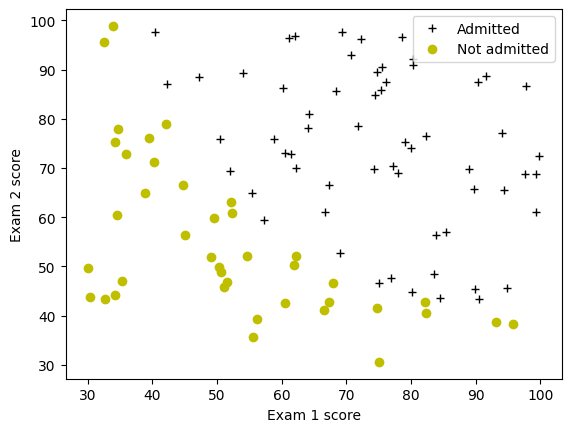

In [39]:
plot_data(x_train,y_train,positive_label="Admitted",negative_label="Not admitted")
plt.ylabel("Exam 2 score")
plt.xlabel("Exam 1 score")
plt.legend(loc="upper right") #creates the legend on the upper right corner
plt.show()

SIGMOID FUNCTION

For logistic regression, the model is represented as $f_{w,b}(x) = g(w.x + b)$
    
To define the sigmoid function: $g(z) = \frac{1}{1-e^{-z}}$


In [40]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g


COST FUNCTION FOR LOGISTIC REGRESSION  


Define cost funcion for logistic regression as $J(w,b) = \frac{1}{m}\sum \limits _{i=0} ^{m-1} [loss(f_{w,b}(x^{(i)}),y^{(i)})]$  
  
the cost for a single data poin is:  $loss(f_{w,b}(x^{(i)}),y^{(i)})=(-y^{(i)}log(f_{w,b}(x^{(i)}))-(1-y^{(i)})log(1-f_{w,b}(x^{(i)}))$

In [41]:
def compute_cost(x,y,w,b,lambda_=1):
    m,n=x.shape #m is the number of rows and n is the number of columns
    cost=0
    for i in range(m):
        z=np.dot(x[i],w)+b #np.dot() is a NumPy function used to perform matrix multiplication. In this case, x[i] is a row vector of features for the i-th example, w is a column vector of weights
        f_wb=sigmoid(z)
        cost+=-y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb)
    total_cost=cost/m
    
    return total_cost


In [42]:
#Compute and display the cost with w initialized to zeros
m,n=x_train.shape

initial_w=np.zeros(n) #n=2 and corresponds to the number of columns(features) 
initial_b=0.
cost=compute_cost(x_train,y_train,initial_w,initial_b)
print("The cost at initial w(zeros) is: %.3f" %(cost))

The cost at initial w(zeros) is: 0.693



GRADIENT FOR LOGISTIC REGRESSION  

the gradient descent algorithm is: repeat until convergence: for j: =0..n-1  
  
$b: =b-\alpha \frac{\partial J(w,b)}{\partial b}$  
  
  
$w_j: =w_j-\alpha \frac{\partial J(w,b)}{\partial w_{j}}$  
  
  

recall that:  
  

$\frac{\partial J(w,b)}{\partial b}= \frac{1}{m} \sum \limits _{i=0} ^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})$  
  

$\frac{\partial J(w,b)}{\partial w_{j}}= \frac{1}{m} \sum \limits _{i=0} ^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})x_{j}^{(i)})$



In [43]:
def compute_gradient(x,y,w,b,lambda_=None):
    m,n=x.shape #m is the number of rows and n is the number of columns
    dj_dw=np.zeros(w.shape) #dj_dw will accumulate the gradient values for each sample, it is initialized as an array of zeros with the same shape as w
    dj_db=0. #dj_dw and dj_db are initialized with zeros because they will be updated inside a loop.

    for i in range(m):
        f_wb_i=sigmoid(np.dot(x[i],w)+b)
        err_i=f_wb_i-y[i]
        for j in range(n):
            dj_dw[j]+=+err_i*x[i,j]
        dj_db+=err_i
    dj_dw/=m
    dj_db/=m

    return dj_db,dj_dw


In [44]:
#Compute and display gradient with w initialized to zeros

initial_w=np.zeros(n)
initial_b=0.

dj_db,dj_dw=compute_gradient(x_train,y_train,initial_w,initial_b)
print(f"dj_db at initial w (zeros) is: {dj_db}")
print(f"dj_dw at initial w (zeros) is: {dj_dw}")

dj_db at initial w (zeros) is: -0.1
dj_dw at initial w (zeros) is: [-12.00921659 -11.26284221]


LEARNING PARAMETERS USING GRADIENT DESCENT

In [45]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iterations,lambda_):
    m=len(x) #number of training examples
    
    #An array to store cost J and w's at each iteration 
    J_history=[]
    w_history=[]
    
    for i in range(num_iterations):
        dj_db,dj_dw=gradient_function(x,y,w_in,b_in,lambda_)  #Calculate the gradient and update the parameters
        w_in=w_in-alpha*dj_dw # Update Parameters using w, b, alpha and gradient
        b_in=b_in-alpha*dj_db
        
        if i<100000: #In practice, the value 100000 can be adjusted depending on the size of the dataset and the computational resources available. If the dataset is small, a smaller value can be used, while a larger value can be used for larger datasets. It is also possible to remove this condition altogether and store the cost at every iteration if memory is not a concern.
            cost=cost_function(x,y,w_in,b_in,lambda_)
            J_history.append(cost) #is appending the current value of the cost function to the end of the list J_history. This list is used to keep track of the cost function values at each iteration of the gradient descent algorithm. Later, this list can be used to plot the change in cost function with respect to the number of iterations.
        if i%math.ceil(num_iterations/10)==0 or i==(num_iterations-1): #checks if the current iteration number i is a multiple of num_iters/10. This condition is true for every 10% of the total iterations of the iterations or the last iteration      
            w_history.append(w_in)
            print(f"Iteration {i:4} Cost {float(J_history[-1]):8.2f}") #prints the iteration number and the current cost of the model, which is the last element in the J_history list. The {i:4} specifies that the variable i should be formatted with a width of 4 characters and :8.2f that the cost should be formatted as a float with a width of 8 characters and 2 decimal places.

    return w_in,b_in,J_history,w_history




In [46]:
np.random.seed(1) #By setting the seed, you are fixing the sequence of random numbers that will be generated, allowing you to reproduce the same results each time the code is run. It's useful to debug and test the code and to ensure that the random initialization of your model's parameters is consistent across multiple runs.
initial_w=0.01 * (np.random.rand(2)) # initialize the weight parameters with some random values. This is done to avoid the problem of symmetrical weights, which can result in neurons learning the same features during training, leading to poor performance of the model. Initializing the weights with random values breaks the symmetry and allows neurons to learn different features during training.
initial_b=-8 # is also set to a non-zero value to break the symmetry and improve performance.

iterations=10000
alpha=0.001

w,b,J_history,_=gradient_descent(x_train,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations,0)
print("w,b found by gradient descent:",w,b)

Iteration    0 Cost     0.68
Iteration 1000 Cost     0.31
Iteration 2000 Cost     0.30
Iteration 3000 Cost     0.30
Iteration 4000 Cost     0.30
Iteration 5000 Cost     0.30
Iteration 6000 Cost     0.30
Iteration 7000 Cost     0.30
Iteration 8000 Cost     0.30
Iteration 9000 Cost     0.30
Iteration 9999 Cost     0.30
w,b found by gradient descent: [0.07125399 0.06482932] -8.188679359279176


PLOTTING THE DECISION BOUNDARY

In [47]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [48]:
def plot_decision_boundary(w, b, x, y):
    # Credit to dibgerge on Github for this plotting code
     
    plot_data(x[:, 0:2], y)
    
    if x.shape[1] <= 2:
        plot_x = np.array([min(x[:, 0]), max(x[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0
        plt.contour(u,v,z, levels = [0.5], colors="g")

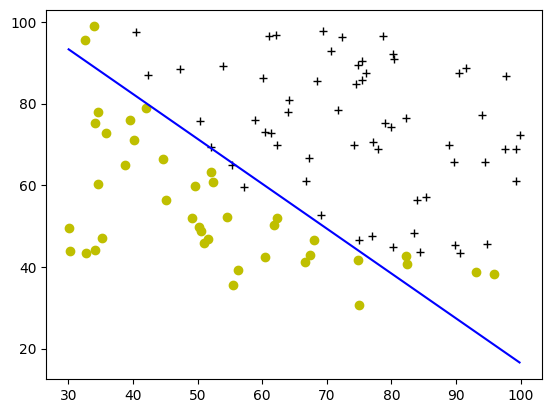

In [49]:
plot_decision_boundary(w,b,x_train,y_train)

EVALUATING LOGISTIC REGRESSION

$f(x^{(i)}) = g(w.x^{(i)})$  


We interpret the output of the model $f(x^{(i)})$ as the probability that $y^{(i)}=1$ given $x^{(i)}$ and parameterized by w.  

To get the final prediction $y^{(i)}=0$ or $y^{(i)}=1$ from logistic regression model, we can use:  
  
if $f(x^{(i)})>=0.5$, predict $y^{(i)}=1$  
  
if $f(x^{(i)})<0.5$, predict $y^{(i)}=0$  


In [50]:
def predict(x,w,b):
    m,n=x.shape
    p=np.zeros(m)

    for i in range(m):
        z_wb=np.dot(x[i],w)
        z_wb+=b
        f_wb=sigmoid(z_wb)
        p[i]=1 if f_wb>=0.5 else 0
    return p

In [51]:
p=predict(x_train,w,b)
print('Train accuracy:%f'%(np.mean(p==y_train)*100))

Train accuracy:92.000000


Test Predict Function

In [52]:
x_test = np.array([[40, 90]])  # Convert the list to a NumPy array
print(predict(x_test,w,b))

[1.]


REGULARIZED LOGISTIC REGRESSION couldn't finish


In [53]:
def load_data():
    data=np.loadtxt(r'C:/Users/pedro\source/repos/PedroCorreia07/Machine Learing Specialization_Coursera/Course 1\data_logistic regression/ex2data2.txt', delimiter=',')
    X=data[:,:2] #creates a new NumPy array X which contains all the rows of data, but only the first two columns (0 and 1). Here, the syntax [:,:2] means to select all rows (:) and the first two columns (:2), so it effectively selects only the feature columns.
    y=data[:,2] #creates a new NumPy array y which contains all the rows of data, but only the third column (2). So, it effectively selects only the target column
    return X,y

In [54]:
x_train, y_train=load_data()

In [55]:
print("x_train",x_train[:5])
print("Type of x_train:",type(x_train))
print("y_train",y_train[:5])
print("Type of y_train:",type(y_train))

x_train [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of x_train: <class 'numpy.ndarray'>
y_train [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [56]:
print("The shape of x_train is:"+str(x_train.shape))
print("The shape of y_train is:"+str(y_train.shape))
print("The number of training examples is m=" + str(len(y_train)))


The shape of x_train is:(118, 2)
The shape of y_train is:(118,)
The number of training examples is m=118


In [57]:
def plot_data(x,y,positive_label="y=1",negative_label="y=0"):
    positive=y==1
    negative=y==0

    #plot examples
    plt.plot(x[positive,0],x[positive,1],"k+",label=positive_label)
    plt.plot(x[negative,0],x[negative,1],"yo",label=negative_label)

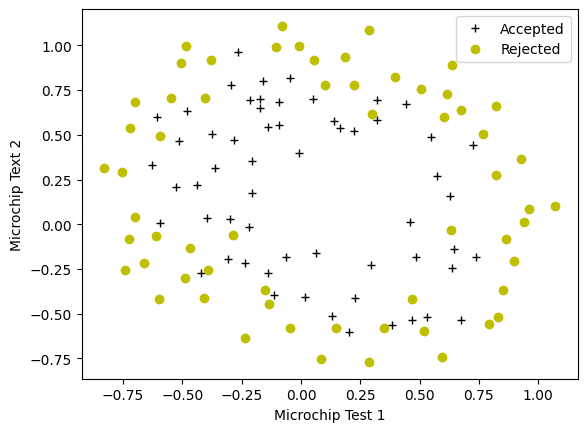

In [58]:
plot_data(x_train,y_train[:],positive_label="Accepted", negative_label="Rejected")

plt.ylabel("Microchip Text 2")
plt.xlabel("Microchip Test 1")
plt.legend(loc="upper right")
plt.show()

FEATURE MAPPING

In [59]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1) #These lines ensure that X1 and X2 are converted into NumPy arrays, even if they are initially provided as scalars or lists.
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [60]:
#As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 27-dimensional vector.
#A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will be nonlinear when drawn in our 2-dimensional plot.

print("Original shape of data:", x_train.shape)

mapped_x =  map_feature(x_train[:, 0], x_train[:, 1])
print("Shape after feature mapping:", mapped_x.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [61]:
print("x_train[0]",x_train[0])
print("mapped x_train[0]",mapped_x[0])

x_train[0] [0.051267 0.69956 ]
mapped x_train[0] [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


$J(w.b)=\frac{1}{m} \sum \limits _{i=0} ^{m-1} [-y^{(i)}log(f_{w,b}(x^{(i)}))-(1-y^{(i)})log(1-f_{w,b}(x^{(i)}))]+\frac{\lambda}{2m} \sum \limits _{j=0} ^{n-1} w_{j} ^{2} $  
  
Note that we add the regularization term: $\frac{\lambda}{2m} \sum \limits _{j=0} ^{n-1} w_{j} ^{2}$



In [62]:
def compute_cost_reg(x,y,w,b,lambda_=1):
    
    m,n=x.shape
    
    cost_without_reg=compute_cost(x,y,w,b) # Calls the compute_cost function that you implemented above
    reg_cost=0. # I need to calculate this value
    reg_cost=sum(np.square(w))
    total_cost=cost_without_reg+(lambda_/(2*m))*reg_cost

    return total_cost


$\frac{\partial J(w,b)}{\partial b}= \frac{1}{m} \sum \limits _{i=0} ^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})$  
  

$\frac{\partial J(w,b)}{\partial w_{j}}= \frac{1}{m} \sum \limits _{i=0} ^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})x_{j}^{(i)})+\frac{\lambda}{m} w_{j}$  

The only diference between the cost function without regularization and the cost function with regularization is that we add the $\frac{\lambda}{m} w_{j} for j=0...(n-1)$
  


In [63]:
def compute_gradient_reg(x,y,w,b,lambda_=1):
    m,n=x.shape

    dj_db,dj_dww=compute_gradient(x,y,w,b)

    for j in range(n):
        dj_dw[j]=dj_dw[j]+(lambda_/m)*w[j]
    
    return dj_db,dj_dw

In [71]:
np.random.seed(1) #By setting the seed, you are fixing the sequence of random numbers that will be generated, allowing you to reproduce the same results each time the code is run. It's useful to debug and test the code and to ensure that the random initialization of your model's parameters is consistent across multiple runs.

initial_w=np.random.rand(mapped_x.shape[27])-0.5
inital_b=1

lambda_=0.01

iterations=10000
alpha=0.01

w,b,J_history,_=gradient_descent(mapped_x,y_train,initial_w,initial_b,compute_cost_reg,compute_gradient_reg,alpha,iterations,lambda_)

IndexError: tuple index out of range